In [1]:
from pathlib import Path
current_dir = Path.cwd()
current_dir

WindowsPath('E:/git/machine-learning-option-pricing/historical_data')

In [2]:
import os
filedir = os.path.join(current_dir,'historical_av_calibrations')
os.chdir(filedir)

In [3]:
Path.cwd()

WindowsPath('E:/git/machine-learning-option-pricing/historical_data/historical_av_calibrations')

In [4]:
from model_settings import ms
csvs = ms.csv_query
for i,f in enumerate(csvs):
    print(f"{i}. {f}")


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual

0. av_calibrated puts 2020-01-01_2024-10-08.csv
1. av_calibrated puts 2024-09-01_2024-10-08.csv


In [5]:
import pandas as pd
df = pd.read_csv(csvs[0])
df = df.iloc[:,1:].copy()

In [6]:
df.describe()

,spot_price,theta,rho,kappa,eta,v0,relative_error
count,1136.000000,1.136000e+03,1136.000000,1.136000e+03,1.136000e+03,1.136000e+03,1.136000e+03
mean,418.510531,9.176104e+00,-0.294741,1.703108e+02,2.362364e+02,1.652907e+00,1.040892e+09
std,69.608788,7.480576e+01,0.412369,1.344172e+03,1.823815e+03,1.621057e+01,3.108259e+10
min,223.970000,2.604705e-13,-1.000000,8.772929e-09,9.425137e-09,4.470130e-10,3.172878e-03
25%,378.040000,9.431139e-02,-0.601105,4.485103e-02,1.990344e+00,2.443487e-02,6.790605e-02
50%,420.215000,1.438032e-01,-0.344533,2.243822e+00,3.653256e+00,4.406558e-02,9.824958e-02
75%,454.713750,1.418432e+00,0.026015,5.873114e+00,6.014827e+00,7.031603e-02,1.326135e-01
max,572.320000,1.674265e+03,0.999909,2.386247e+04,3.479557e+04,3.966430e+02,1.042981e+12


In [11]:
df = df[df['relative_error']<0.2].reset_index(drop=True).copy()
df

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error,w
0,323.71000,2020-01-02,0.067323,-0.534180,2.446704,1.714163,0.012489,0.032893,puts
1,322.37000,2020-01-03,0.050029,-0.613393,5.476240,2.232813,0.012026,0.030073,puts
2,322.04500,2020-01-06,0.051965,-0.632509,4.004673,1.661999,0.014319,0.026312,puts
3,322.89000,2020-01-07,0.158072,-0.422042,0.721757,1.544762,0.018725,0.046045,puts
4,324.22500,2020-01-08,0.042281,-0.676738,5.350000,1.654111,0.012423,0.019367,puts
...,...,...,...,...,...,...,...,...,...
964,570.03110,2024-10-01,0.624390,-0.169221,2.198334,26.574356,0.100556,0.092769,puts
965,567.58500,2024-10-02,0.126180,-0.299852,10.192830,16.505321,0.046384,0.097556,puts
966,567.64625,2024-10-03,0.079279,-1.000000,1.090833,0.244937,0.017958,0.058716,puts
967,570.73000,2024-10-04,11.963353,-0.004504,0.029324,8.042351,0.061405,0.147108,puts


In [17]:
df.dtypes

spot_price                 float64
calculation_date    datetime64[ns]
theta                      float64
rho                        float64
kappa                      float64
eta                        float64
v0                         float64
relative_error             float64
w                           object
dtype: object

In [18]:
df['calculation_date'] = pd.to_datetime(df['calculation_date'],format="%Y-%m-%d")

In [19]:
df.dtypes

spot_price                 float64
calculation_date    datetime64[ns]
theta                      float64
rho                        float64
kappa                      float64
eta                        float64
v0                         float64
relative_error             float64
w                           object
dtype: object

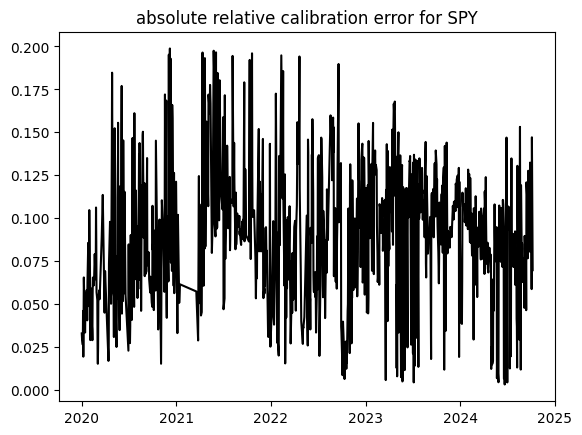

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.set_index('calculation_date')['relative_error'],color='black')
plt.title('absolute relative calibration error for SPY')
plt.show()
plt.clf()